In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import json

In [4]:
os.listdir(".")

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'data',
 'Distribution-plot-on-protected-variables.ipynb',
 'Distribution.ipynb',
 'Distribution2.ipynb',
 'PipeLine.ipynb',
 'processed_data',
 'README.md',
 'requirements.txt']

In [5]:
def extractRawRedactedData(entityType='/location/address'):
    f=open("./data/raw/sample_submission_file1.json",'r')
    data=list(json.load(f).values())[0]
    print(entityType,data[0])
    redactedData=list(filter(lambda x:x['types']==entityType,data))
    processedData=open("./processed_data/processed_file1.json","w")
    json.dump(redactedData,processedData)
    return redactedData
    

In [6]:
processedData=extractRawRedactedData()

/location/address {'text': 'Let me explain to you why I believe this : For years, SunTrust advertised and promoted in big letters their entity_1 debit card.', 'entity': 'entity_1', 'types': '/interest/product'}


In [7]:
def loadImputationalData():
    f=open("./data/raw/town_of_newton-addresses-city.geojson",'r')
    locationData=f.readlines()
    address=list()
    for ele in locationData:
        address.append(json.loads(ele.strip("\n"))['properties'])
    return pd.DataFrame(address)

    

In [8]:
addressDf=loadImputationalData()

In [9]:
addressDf.head()

,hash,number,street,unit,city,district,region,postcode,id
0,5ed816d8cf1816d8,427,AUBURN ST,,AUBURNDALE,,,02466,106766427B
1,1fe5fdf65aa2d9d6,137,HAGEN RD,,NEWTON CENTRE,,,02459,157159137
2,c6b924c8eeb2f784,82,CHURCH ST,,NEWTON,,,02458,12695882
3,57c14fcbae7117d0,639,DEDHAM ST,,NEWTON CENTRE,,,02459,137359639
4,5fe7bbbab5119d38,119,HIGHLAND AVE,,NEWTONVILLE,,,02460,162560119


In [16]:
ids=addressDf['id'].tolist()
print(len(ids))
uniqueIds=list(set(ids))
print(len(uniqueIds))
repeatedIds=list(filter(lambda x:ids.count(x)>1,uniqueIds))
print(repeatedIds)

40395
40336
['234359140U1', '172258119', '1095599', '16246445', '1309591160', '17225881', '216158150', '172258126', '172258124', '17225883', '17225897', '172258120', '174660128', '234359140', '172258112', '17225895', '172258101', '24416888', '172258103', '172258118', '137359755', '117659193', '172258117', '172258128', '172258116', '17225885', '172258105', '13736110', '109659740', '115359380', '172258113', '172258114', '172258125', '172258122', '15365921', '20235821', '172258108', '172258115', '17225887', '235458400', '13375990', '1153673', '13096760', '172258121', '172258107', '172258109', '172258106', '2350661960', '172258110', '18446688', '172258123', '172258111', '17785990', '172258127', '2350622344', '17225891', '17225893', '17225889', '17225899']


In [17]:
addressDf[addressDf['id']=='172258127']

,hash,number,street,unit,city,district,region,postcode,id
9433,ab41dbec05cc86c4,127,KENNEDY CIR,,NEWTON,,,02458,172258127
22245,11a38178749c7532,127,JOHN F KENNEDY CIR,,NEWTON,,,02458,172258127


In [13]:
len(set(uniqueHashs))

NameError: name 'uniqueHashs' is not defined

In [18]:
# removing duplicate data
addressDf.drop_duplicates(subset="id",keep='first',inplace=True)

In [19]:
addressDf.head()

,hash,number,street,unit,city,district,region,postcode,id
0,5ed816d8cf1816d8,427,AUBURN ST,,AUBURNDALE,,,02466,106766427B
1,1fe5fdf65aa2d9d6,137,HAGEN RD,,NEWTON CENTRE,,,02459,157159137
2,c6b924c8eeb2f784,82,CHURCH ST,,NEWTON,,,02458,12695882
3,57c14fcbae7117d0,639,DEDHAM ST,,NEWTON CENTRE,,,02459,137359639
4,5fe7bbbab5119d38,119,HIGHLAND AVE,,NEWTONVILLE,,,02460,162560119


In [53]:
def generateAddress(rowId,addressDf):
#     print(rowId)
    row=addressDf[addressDf['id']==rowId]
#     print(row)
    return "#"+str(row['number'].values[0])+","+row['street'].values[0]+","+row['city'].values[0]+","+str(row['postcode'].values[0])


In [54]:
generateAddress("106766427B",addressDf)

'#427,AUBURN ST,AUBURNDALE,02466'

In [56]:
import copy
def imputeAtRandom(address,data):
    #print(data)
    randomAddress=address.sample(1)
    data["imputedLocationId"]=randomAddress['id'].values[0]
    #print(randomAddress['id'].values[0])
    #print(data)
    data["imputedLocation"]=generateAddress(randomAddress['id'].values[0],address)
    return data

        

randomImputedData=copy.deepcopy(processedData)
for i in range(len(randomImputedData)):
    randomImputedData[i]=imputeAtRandom(addressDf,randomImputedData[i])

In [59]:
randomImputedData[:3]

[{'text': 'And told TD Bank that I need them to inform entity_19 that it is paid off so I can open an account.',
  'entity': 'entity_19',
  'types': '/location/address',
  'imputedLocationId': '100858174U2',
  'imputedLocation': '#174,ADAMS ST,NEWTON,02458'},
 {'text': 'I visited the branch of entity_23 since they have taken over all branches from Popular, they refused to honor the bonus.',
  'entity': 'entity_23',
  'types': '/location/address',
  'imputedLocationId': '194058218',
  'imputedLocation': '#218,NEWTONVILLE AVE,NEWTON,02458'},
 {'text': 'The problem is with EXPERIANTo know my score I paid {$1.00}, that is how they get my debit card information and they have been charging from entity_27 to present the monthly amount of {$19.00}. Could not make it stop.',
  'entity': 'entity_27',
  'types': '/location/address',
  'imputedLocationId': '2350622276',
  'imputedLocation': '#2276,WASHINGTON ST,NEWTON LOWER FALLS,02462'}]

1.0240641711229947
0.15324844792414008


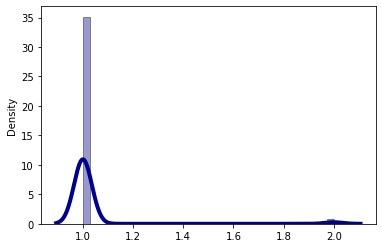

In [63]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
locationIds=[ele['imputedLocationId'] for ele in randomImputedData]
uniqueIds=list(set(locationIds))
frequency=[locationIds.count(ele) for ele in uniqueIds]
print(np.mean(frequency))
print(np.std(frequency))
#print(frequency)
sns.distplot(frequency, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()